# Data Analysis of Sunwal-1 Voters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('sunwal1.csv')

## Sample of any five row from dataset

In [3]:
df.sample(5)

,सि.नं.,मतदाता नं,मतदाताको नाम,उमेर (वर्ष),लिङ्ग,पति/पत्नीको नाम,पिता/माताको नाम,विवरण
249,250,12993441,ईश्‍वर बहादुर राना,49,पुरुष,तुल कुमारी,पदम / मीनु,NaN
724,725,7871028,गमी थापा,40,महिला,कटिक बहादुर,खिम बहादुर/ कला,NaN
2327,2328,13518786,मना देवी ढकाल,42,महिला,नारायण,तारा प्रसाद/ भुमकान्ती,NaN
2427,2428,13519478,मान बहादुर वि. क.,61,पुरुष,डिल माया वि.,विर बहादुर वि./ रविसरा वि.,NaN
1948,1949,12929753,प्रभु मल्ल,47,पुरुष,सारदा,चन्द्र बहादुर/ वाल कुमारी,NaN


## Removing biwarad column and serial number column

In [4]:
df = df[['मतदाता नं','मतदाताको नाम','उमेर (वर्ष)','लिङ्ग','पति/पत्नीको नाम','पिता/माताको नाम']]

In [5]:
df.sample(5)

,मतदाता नं,मतदाताको नाम,उमेर (वर्ष),लिङ्ग,पति/पत्नीको नाम,पिता/माताको नाम
699,13518792,गंगा बहादुर पुन,83,पुरुष,खुमा,कुविर / मन माया
715,16524669,गणेश नाथ कंवर,55,पुरुष,नुगा कुमारी कंवर,राम साजन/ जानकी
418,13517519,कल्पना भुसाल,41,महिला,यादव,जागनन्द / हेमा कुमारी
1054,19458710,ज्ञान बहादुर कंवर,26,पुरुष,-,गंगा नाथ कंवर/ जमुना
3330,13518724,विष्‍णु गौतम,57,महिला,डण्‍डपाणी,तिलक / तिलमाया


## Total numbers of Voters

In [6]:
df.shape[0]

4236

In [7]:
age_group = pd.cut(df['उमेर (वर्ष)'],bins=[16,25,35,45,55,65,np.inf],labels=['16-25','26-35','36-45','46-55','56-65','66+'])

In [8]:
age_group.value_counts()

26-35    1037
36-45     909
46-55     706
16-25     633
56-65     520
66+       431
Name: उमेर (वर्ष), dtype: int64

In [9]:
crosstb = pd.crosstab(age_group,df['लिङ्ग'])

In [10]:
crosstb

लिङ्ग,पुरुष,महिला
उमेर (वर्ष),,
16-25,343,290
26-35,456,581
36-45,363,546
46-55,321,385
56-65,261,259
66+,233,198


## Distribution of Voter in Age and Gender

<Figure size 1152x648 with 0 Axes>

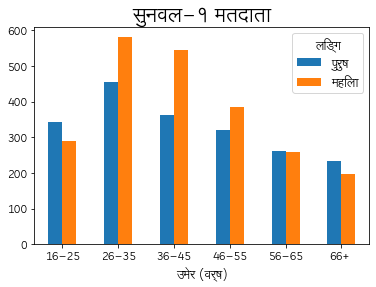

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))


plt.rc('font', family='Lohit Devanagari',size=12)
crosstb.plot.bar(rot=0)
plt.title('सुनवल-१ मतदाता',fontsize=20)
plt.show()

## Distribution of Voter in Age

<AxesSubplot:xlabel='उमेर (वर्ष)', ylabel='Count'>

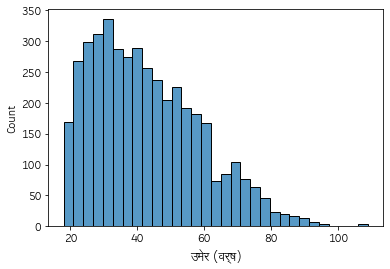

In [12]:
sns.histplot(x=df['उमेर (वर्ष)'])

## Distribution of Voters in Relation Status

In [13]:
df['Relation Status'] = ['Couple' if len(x.replace(" ",""))>2 else 'Single' for x in df['पति/पत्नीको नाम']]

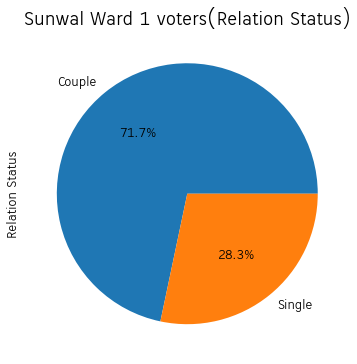

In [14]:
plt.figure(figsize=(10,6))
plt.rc('font',size=14)
plt.title('Sunwal Ward 1 voters(Relation Status)',fontsize=20)

ax = df['Relation Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

## Distribution of Voters in Terms of Gender

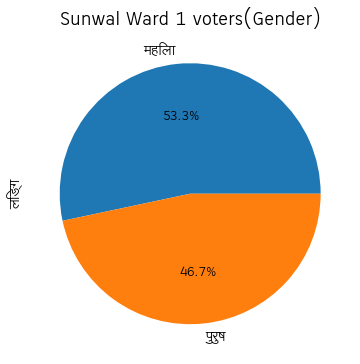

In [15]:
plt.figure(figsize=(10,6))
plt.rc('font',size=14)
plt.title('Sunwal Ward 1 voters(Gender)',fontsize=20)

ax = df['लिङ्ग'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

## Eldest Voters in Sunwal-1

In [16]:
df[df['उमेर (वर्ष)']==df['उमेर (वर्ष)'].max()]

,मतदाता नं,मतदाताको नाम,उमेर (वर्ष),लिङ्ग,पति/पत्नीको नाम,पिता/माताको नाम,Relation Status
3197,13517447,विनमाधव भट्टराई,109,पुरुष,तुल्‍सा कुमारी,खेम प्रसाद/ कुन्‍ता,Couple
3398,13517357,शम्भु नाथ कुंवर,109,पुरुष,गंगा,राम प्रसाद/ फुल कुमारी,Couple
3949,20036084,सुमन थापा मगर,109,पुरुष,-,चुरा वहादुर थापा/ मन माया,Single


## Average Age of Voters in terms of Gender

<AxesSubplot:xlabel='लिङ्ग', ylabel='उमेर (वर्ष)'>

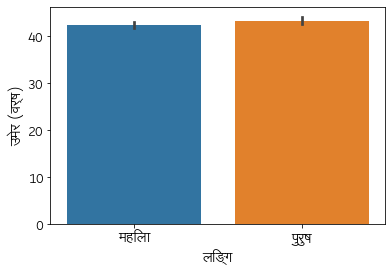

In [17]:
sns.barplot(x=df['लिङ्ग'],y=df['उमेर (वर्ष)'])

## Age Distribution of Voters in Terms of Gender
### - It tells that males has more outliers in maximum ages.
### - It tells that females age is slightly more condense than of males.

<AxesSubplot:xlabel='लिङ्ग', ylabel='उमेर (वर्ष)'>

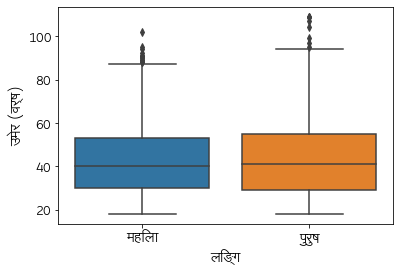

In [18]:
sns.boxplot(x=df['लिङ्ग'],y=df['उमेर (वर्ष)'])

## Age Distribution of Voters [Distplot]

/home/prototype/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/prototype/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='उमेर (वर्ष)', ylabel='Density'>

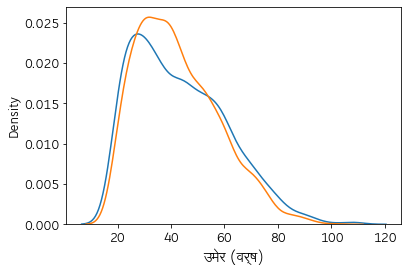

In [19]:
sns.distplot(df[df['लिङ्ग']=='पुरुष']['उमेर (वर्ष)'],hist=False)
sns.distplot(df[df['लिङ्ग']=='महिला']['उमेर (वर्ष)'],hist=False)